In [1]:
# importing the libraries

from bs4 import BeautifulSoup
import requests

In [18]:
#demo website (Source = Forbes website)

url = 'https://eqvista.com/fortune-500-companies-in-the-us/'

In [19]:
# calling the page
page = requests.get(url)

#converting the souce text into html format
soup = BeautifulSoup(page.text,'html')

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="/wp-content/favicons/favicon-96x96.png" rel="icon" sizes="96x96" type="image/png"/>
  <link href="/wp-content/favicons/favicon.svg" rel="icon" type="image/svg+xml"/>
  <link href="/wp-content/favicons/favicon.ico" rel="icon"/>
  <link href="/wp-content/favicons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <meta content="Eqvista" name="apple-mobile-web-app-title"/>
  <link href="/wp-content/favicons/site.webmanifest" rel="manifest"/>
  <link href="https://fonts.googleapis.com" rel="preconnect"/>
  <link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/>
  <link href="https://fonts.googleapis.com/css2?family=Titillium+Web:wght@300;400;600;700&amp;display=swap" rel="stylesheet"/>
  <link crossorigin="anonymous" href="https://use.fontawesome.com/releases/v5.2.0/css/all.css" integrity="sha384-hWVjflwFx
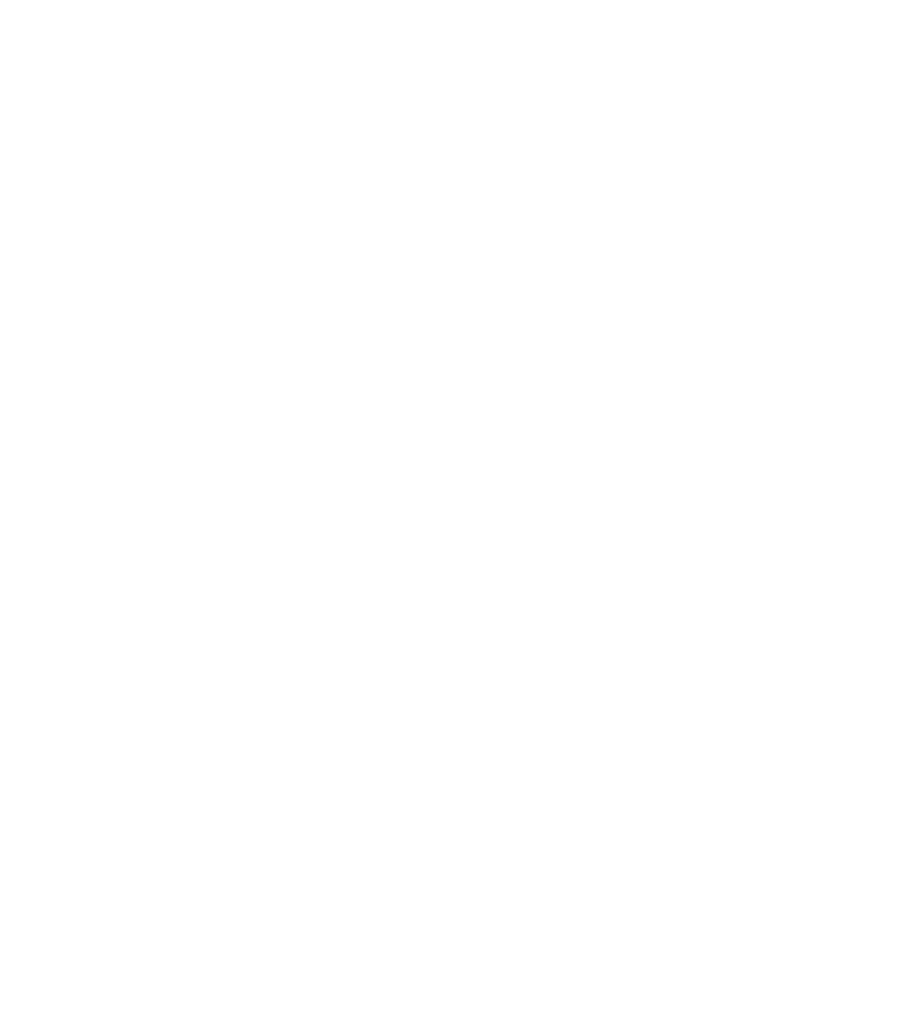

In [21]:
print(soup.prettify())

In [24]:
soup.find('table')

<table class="tablepress tablepress-id-1230" id="tablepress-1230">
<thead>
<tr class="row-1 odd">
<th class="column-1">Rank</th><th class="column-2">Company Name </th><th class="column-3">Revenue ($M)</th><th class="column-4">Assets ($M)</th><th class="column-5">Market Value ($M)</th>
</tr>
</thead>
<tbody class="row-hover">
<tr class="row-2 even">
<td class="column-1">1</td><td class="column-2">Walmart</td><td class="column-3">$680,985</td><td class="column-4">$260,823</td><td class="column-5">$703,799</td>
</tr>
<tr class="row-3 odd">
<td class="column-1">2</td><td class="column-2">Amazon</td><td class="column-3">$637,959</td><td class="column-4">$624,894</td><td class="column-5">$2,016,324</td>
</tr>
<tr class="row-4 even">
<td class="column-1">3</td><td class="column-2">UnitedHealth Group</td><td class="column-3">$400,278</td><td class="column-4">$298,278</td><td class="column-5">$479,081</td>
</tr>
<tr class="row-5 odd">
<td class="column-1">4</td><td class="column-2">Apple</td><t

In [27]:
#separating the headrows

soup.find_all('tr',class_ = 'row-1 odd')

[<tr class="row-1 odd">
 <th class="column-1">Rank</th><th class="column-2">Company Name </th><th class="column-3">Revenue ($M)</th><th class="column-4">Assets ($M)</th><th class="column-5">Market Value ($M)</th>
 </tr>]

In [29]:
world_titles = soup.find_all('th')

In [30]:
world_titles

[<th class="column-1">Rank</th>,
 <th class="column-2">Company Name </th>,
 <th class="column-3">Revenue ($M)</th>,
 <th class="column-4">Assets ($M)</th>,
 <th class="column-5">Market Value ($M)</th>]

In [31]:
world_table_titles = [title.text for title in world_titles]
print(world_table_titles)


['Rank', 'Company Name ', 'Revenue ($M)', 'Assets ($M)', 'Market Value ($M)']


In [32]:
import pandas as pd

In [35]:
df = pd.DataFrame(columns = world_table_titles)
df

,Rank,Company Name,Revenue ($M),Assets ($M),Market Value ($M)


In [38]:
column_data = soup.find_all('tr')

In [42]:
#nested for-loop to retrieve the data under the rows

for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]


    # saving the rows one after another in the df
    length = len(df)
    df.loc[length] = individual_row_data
    

In [43]:
df

,Rank,Company Name,Revenue ($M),Assets ($M),Market Value ($M)
0,1,Walmart,"$680,985","$260,823","$703,799"
1,2,Amazon,"$637,959","$624,894","$2,016,324"
2,3,UnitedHealth Group,"$400,278","$298,278","$479,081"
3,4,Apple,"$391,035","$364,980","$3,336,853"
4,5,CVS Health,"$372,809","$253,215","$85,419"
...,...,...,...,...,...
495,496,Science Applications International,"$7,479","$5,246","$5,360"
496,497,Core & Main,"$7,441","$5,870","$9,560"
497,498,Howmet Aerospace,"$7,430","$10,519","$52,544"
498,498,Ingredion,"$7,430","$7,444","$8,679"


In [46]:
#converting the above table into csv file

df.to_csv(r'C:\Jahid\Data Analyst Bootcamp\companies.csv', index = False)